In [1]:
import gym_duckietown
import matplotlib.pyplot as plt
import numpy as np

from gym_duckietown.simulator import Simulator

import utils
from utils import get_trajectory, get_position, my_odometry


DEBUG:commons:version: 6.2.4 *
DEBUG:typing:version: 6.2.3
DEBUG:duckietown_world:duckietown-world version 6.2.38 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:geometry:PyGeometry-z6 version 2.1.4 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:aido_schemas:aido-protocols version 6.0.59 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages
DEBUG:nodes:version 6.2.13 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages pyparsing 3.0.6
DEBUG:gym-duckietown:gym-duckietown version 6.1.30 path /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages



{'audio': ('xaudio2', 'directsound', 'openal', 'pulse', 'silent'), 'debug_font': False, 'debug_gl': True, 'debug_gl_trace': False, 'debug_gl_trace_args': False, 'debug_graphics_batch': False, 'debug_lib': False, 'debug_media': False, 'debug_texture': False, 'debug_trace': False, 'debug_trace_args': False, 'debug_trace_depth': 1, 'debug_trace_flush': True, 'debug_win32': False, 'debug_x11': False, 'graphics_vbo': True, 'shadow_window': True, 'vsync': None, 'xsync': True, 'xlib_fullscreen_override_redirect': False, 'darwin_cocoa': True, 'search_local_libs': True, 'advanced_font_features': False, 'headless': False, 'headless_device': 0}


In [2]:
plt.rcParams['figure.figsize'] = [7, 7]

In [3]:
#gym_duckietown is very chatty
import logging
gym_duckietown.logger.setLevel(logging.WARNING)

In [4]:
env = Simulator("ETH_large_loop",
    full_transparency=True,
    domain_rand=False,
    user_tile_start=[3,1],
    seed=42,
    max_steps=float("inf"),
)

INFO:duckietown_world: data: /home/giulio/prog/.virtualenvs/RACE/lib/python3.8/site-packages/duckietown_world/data


In [5]:
env.unwrapped.start_pose = [[0.11699990272521976, 0, 0.41029359288296474], -np.pi/2]

In [6]:
x, y = utils.get_interpolation(env)

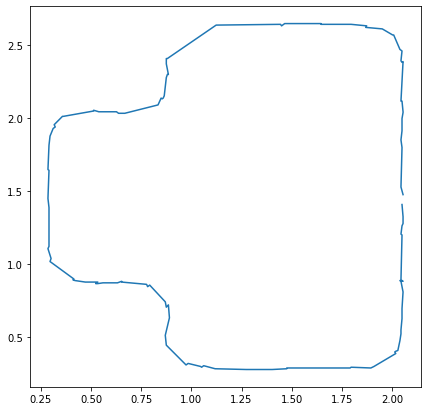

In [7]:
plt.plot(x, y)

In [8]:
x

array([2.05526549, 2.0449115 , 2.0500885 , 2.0449115 , 2.0500885 ,
       2.0500885 , 2.05526549, 2.05526549, 2.0500885 , 2.0449115 ,
       2.05526549, 2.0500885 , 2.0449115 , 2.0500885 , 2.03973451,
       2.00867257, 2.00349558, 1.95172566, 1.86889381, 1.8740708 ,
       1.79641593, 1.64628319, 1.64628319, 1.4650885 , 1.44955752,
       1.44438053, 1.12340708, 0.8800885 , 0.8749115 , 0.8749115 ,
       0.88526549, 0.8800885 , 0.8749115 , 0.86455752, 0.85938053,
       0.85420354, 0.84902655, 0.83349558, 0.66783186, 0.63676991,
       0.62641593, 0.53840708, 0.51252212, 0.51252212, 0.36238938,
       0.35721239, 0.31579646, 0.32097345, 0.31061947, 0.2950885 ,
       0.2899115 , 0.28473451, 0.2899115 , 0.28473451, 0.2899115 ,
       0.2899115 , 0.28473451, 0.30026549, 0.2950885 , 0.41415929,
       0.4089823 , 0.41933628, 0.47110619, 0.47628319, 0.53323009,
       0.52287611, 0.53323009, 0.55911504, 0.63159292, 0.65230088,
       0.65230088, 0.77654867, 0.78172566, 0.79207965, 0.86973

In [9]:
top_view = utils.get_top_view(env)

In [10]:
top_view.shape

(562, 452, 3)

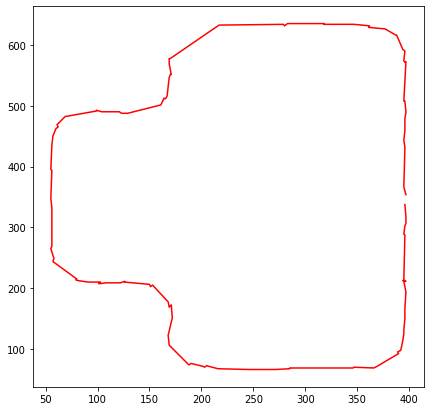

In [11]:
plt.plot([p*top_view.shape[1]/(env.grid_width*env.road_tile_size) for p in x], [p*top_view.shape[0]/(env.grid_width*env.road_tile_size) for p in y], c='r')

In [12]:
top_view.shape

(562, 452, 3)

In [13]:
env.grid_width*env.road_tile_size

2.34

In [14]:
x.max()

2.0552654867256637

In [15]:
env.grid_height*env.road_tile_size

2.925

In [16]:
y.max()

2.6439501779359427

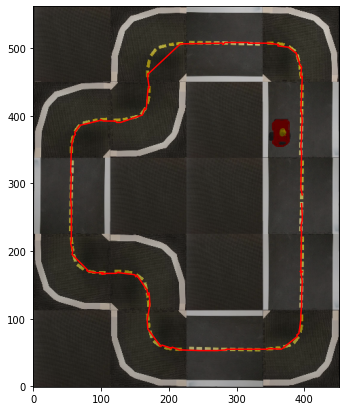

In [17]:
plt.plot(x*top_view.shape[1]/(env.grid_width*env.road_tile_size), y*top_view.shape[0]/(env.grid_height*env.road_tile_size), c='r')
plt.imshow(top_view, origin='lower')

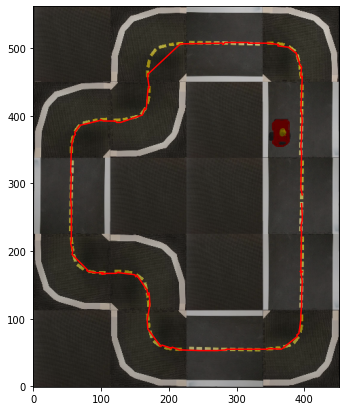

In [18]:
utils.show_on_map_array(env, np.array([x,y]).T)

In [19]:
topdown = env.render(mode="top_down")

In [20]:
import cv2

In [21]:
img = topdown

In [22]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,21,255,cv2.THRESH_BINARY)

In [23]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)

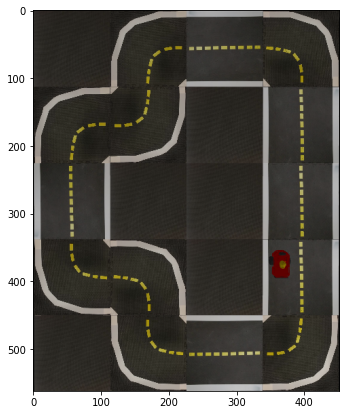

In [24]:
crop = img[y:y+h,x:x+w]
plt.imshow(crop)